# Лабораторная работа 2


Выполнила Скиданова Анна, группа 6231

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [95]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [96]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.680272093239262e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [97]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.018965419606062905


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [98]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447677e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017143643532923733


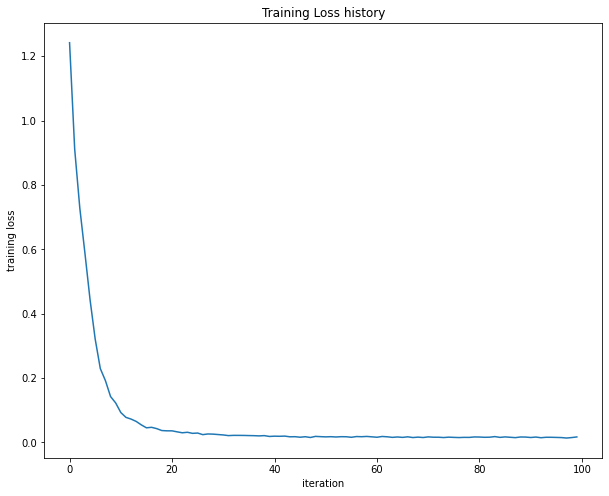

In [99]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [100]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [101]:
X_train.shape

(60000, 28, 28)

In [102]:
num_training=50000
num_val = 1500
mask = range(num_training,num_training+num_val)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

  # Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [103]:
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (1500, 784)
Validation labels shape:  (1500,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [114]:
input_size = 28*28
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302645
iteration 100 / 1000: loss 2.302066
iteration 200 / 1000: loss 2.297987
iteration 300 / 1000: loss 2.259601
iteration 400 / 1000: loss 2.120820
iteration 500 / 1000: loss 1.640217
iteration 600 / 1000: loss 1.200013
iteration 700 / 1000: loss 0.984128
iteration 800 / 1000: loss 0.739315
iteration 900 / 1000: loss 0.762053
Validation accuracy:  0.8126666666666666


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков. 

In [115]:
stats['train_acc_history']
stats['val_acc_history']

[0.08666666666666667, 0.244, 0.514, 0.7513333333333333]

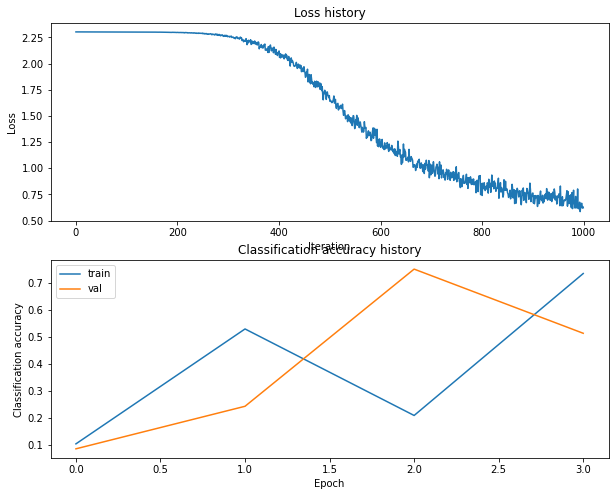

In [116]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(list(set(stats['train_acc_history'])), label='train')
plt.plot(list(set(stats['val_acc_history'])), label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

На валидационном наборе сразу же получается довольно хорошая точности, в среднем около 0.81, повысить точность можно увеличив количество итераций, тогда точность увеличивается до 0.85


In [107]:
input_size = 28*28
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1600, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1600: loss 2.302622
iteration 100 / 1600: loss 2.301846
iteration 200 / 1600: loss 2.295310
iteration 300 / 1600: loss 2.239053
iteration 400 / 1600: loss 2.053260
iteration 500 / 1600: loss 1.637781
iteration 600 / 1600: loss 1.196005
iteration 700 / 1600: loss 1.004088
iteration 800 / 1600: loss 0.818391
iteration 900 / 1600: loss 0.719121
iteration 1000 / 1600: loss 0.654393
iteration 1100 / 1600: loss 0.644083
iteration 1200 / 1600: loss 0.556340
iteration 1300 / 1600: loss 0.572221
iteration 1400 / 1600: loss 0.536795
iteration 1500 / 1600: loss 0.623919
Validation accuracy:  0.862


Так же можно попробовать улучшить результаты путем варьирования параметров

In [108]:
best_val = 0

learning_rates = [1e-2, 1e-3, 1e-4]
reg = [ 1e-2, 1e-3, 1e-4]
batch_size = [200, 400, 800]
results = {}
iters = 1000

for l in learning_rates:
    for r in reg:
        for b in batch_sizes:
               
            net = TwoLayerNet(input_size, hidden_size, num_classes)
            
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=iters, batch_size=b,
                        learning_rate=l, learning_rate_decay=0.95,
                        reg=r)
            y_pred = net.predict(X_val)
            acc_val = np.mean(y_val == y_pred)
            results[(l, r, b)] = (acc_val)
            if best_val < acc_val:
                best_val = acc_val
            

In [109]:
results

{(0.01, 0.01, 200): 0.31266666666666665,
 (0.01, 0.01, 400): 0.10266666666666667,
 (0.01, 0.01, 800): 0.10266666666666667,
 (0.01, 0.001, 200): 0.10266666666666667,
 (0.01, 0.001, 400): 0.10266666666666667,
 (0.01, 0.001, 800): 0.10266666666666667,
 (0.01, 0.0001, 200): 0.10266666666666667,
 (0.01, 0.0001, 400): 0.296,
 (0.01, 0.0001, 800): 0.10266666666666667,
 (0.001, 0.01, 200): 0.9386666666666666,
 (0.001, 0.01, 400): 0.9346666666666666,
 (0.001, 0.01, 800): 0.926,
 (0.001, 0.001, 200): 0.934,
 (0.001, 0.001, 400): 0.928,
 (0.001, 0.001, 800): 0.9373333333333334,
 (0.001, 0.0001, 200): 0.934,
 (0.001, 0.0001, 400): 0.934,
 (0.001, 0.0001, 800): 0.93,
 (0.0001, 0.01, 200): 0.8113333333333334,
 (0.0001, 0.01, 400): 0.792,
 (0.0001, 0.01, 800): 0.784,
 (0.0001, 0.001, 200): 0.8153333333333334,
 (0.0001, 0.001, 400): 0.7786666666666666,
 (0.0001, 0.001, 800): 0.78,
 (0.0001, 0.0001, 200): 0.816,
 (0.0001, 0.0001, 400): 0.7913333333333333,
 (0.0001, 0.0001, 800): 0.788}

In [110]:
print('Лучший результат:', best_val)

Лучший результат: 0.9386666666666666


Сделайте выводы по результатам работы. 

В данной лабораторной работе реализована двуслойная полносвязная сеть, прошедшая обучение на наборе данных mnist. С помощью подбора параметров удалось увеличить показания точности примерно на 8%